In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline
import math
from sklearn.metrics import mean_squared_error

In [51]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/Dissertation - Eth/Data/Ethereum 3 Year prices.csv', index_col='Date')

In [7]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
"Aug 15, 2019",187.80,186.59,189.30,176.08,14.03M,0.66%
"Aug 16, 2019",184.55,187.67,188.03,179.35,11.33M,-1.73%
"Aug 17, 2019",184.81,184.55,186.12,181.58,8.78M,0.14%
"Aug 18, 2019",193.68,184.83,197.17,182.96,9.11M,4.80%
"Aug 19, 2019",201.64,193.67,202.81,192.33,8.14M,4.11%


In [8]:
df = df["Close"]
df.shape

(1097,)

<AxesSubplot:xlabel='Date', ylabel='Close'>

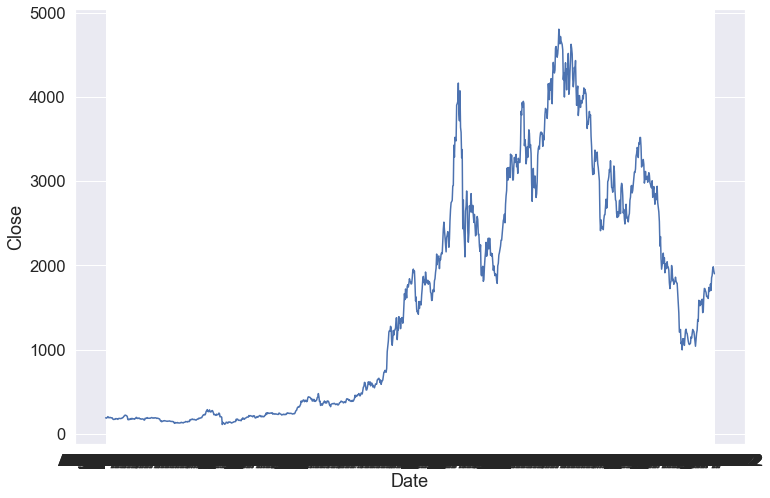

In [15]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df.index, y=df, data=df)

In [16]:
data = df.iloc[:]
hist = []
target = []
length = 90
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)

In [17]:
print(hist[1][89])
print(data[90])
print(target[0])

188.36
188.36
188.36


In [18]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [19]:
hist.shape

(1007, 90)

In [20]:
target.shape

(1007, 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
hist_scaled = sc.fit_transform(hist)
target_scaled = sc.fit_transform(target)

In [22]:
hist_scaled = hist_scaled.reshape((len(hist_scaled), length, 1))
print(hist_scaled.shape)

(1007, 90, 1)


In [36]:
X_train = hist_scaled[:907,:,:]
X_test = hist_scaled[907:,:,:]
y_train = target_scaled[:907,:]
y_test = target_scaled[907:,:]

In [24]:
import tensorflow as tf
from tensorflow.keras import layers

In [25]:
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,
                  input_shape=(90,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,
                  dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.2))
model.add(layers.Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 90, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
29/29 [==============================] - 25s 217ms/step - loss: 0.0378
Epoch 2/30
29/29 [==============================] - 6s 197ms/step - loss: 0.0070
Epoch 3/30
29/29 [==============================] - 5s 186ms/step - loss: 0.0055
Epoch 4/30
29/29 [==============================] - 6s 190ms/step - loss: 0.0058
Epoch 5/30
29/29 [==============================] - 5s 172ms/step - loss: 0.0054
Epoch 6/30
29/29 [==============================] - 5s 183ms/step - loss: 0.0058
Epoch 7/30
29/29 [==============================] - 5s 165ms/step - loss: 0.0055
Epoch 8/30
29/29 [==============================] - 5s 189ms/step - loss: 0.0050
Epoch 9/30
29/29 [==============================] - 5s 179ms/step - loss: 0.0053
Epoch 10/30
29/29 [==============================] - 5s 172ms/step - loss: 0.0048
Epoch 11/30
29/29 [==============================] - 5s 179ms/step - loss: 0.0051
Epoch 12/30
29/29 [==============================] - 5s 172ms/step - loss: 0.0049
Epoch 13/30
29/29 [=====

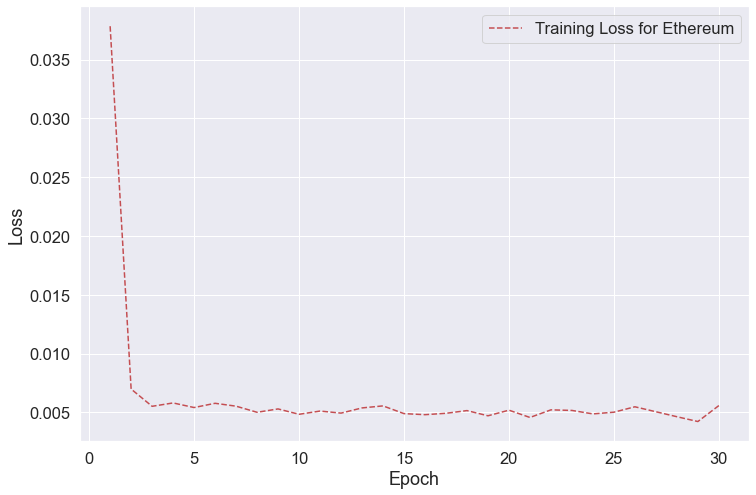

In [43]:
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.legend(['Training Loss for Ethereum'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

4/4 [==============================] - 3s 48ms/step


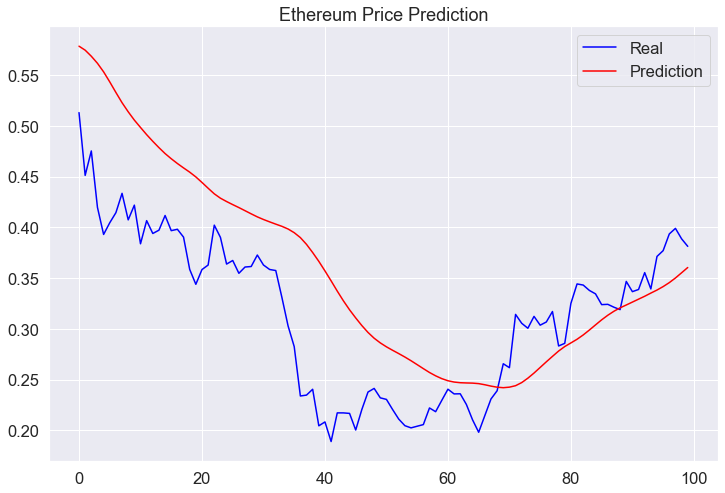

In [29]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Ethereum Price Prediction')
plt.legend()
plt.show()

4/4 [==============================] - 5s 100ms/step


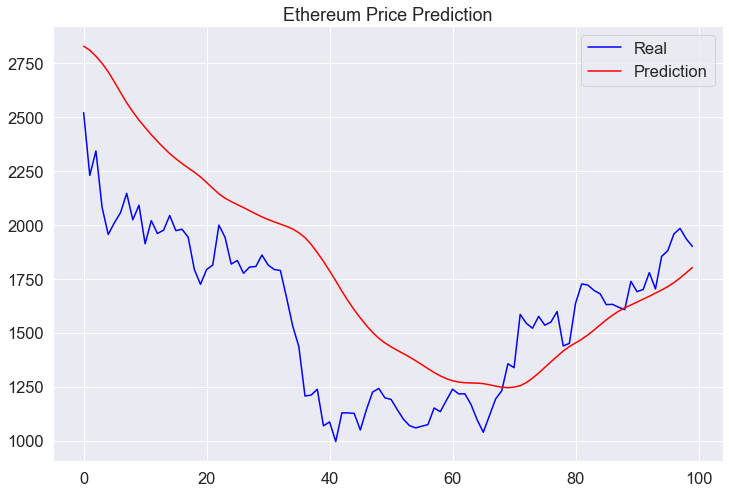

In [44]:
pred_transformed = sc.inverse_transform(pred)
y_test_transformed = sc.inverse_transform(y_test)

pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test_transformed, color='blue', label='Real')
plt.plot(pred_transformed, color='red', label='Prediction')
plt.title('Ethereum Price Prediction')
plt.legend()
plt.show()

In [31]:
math.sqrt(mean_squared_error(y_test_transformed, pred_transformed))

348.95412459014625

In [47]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test_transformed, pred_transformed)
print("Mean absolute error : " + str(error))

Mean absolute error : 290.23854448242184


In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error2 = mean_absolute_percentage_error(y_test_transformed, pred_transformed)
print("MAPE:", error2)

MAPE: 19.49538983917082
